In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [ ]:
print(X_train.shape) # 28*28 이미지
print(y_train.shape)

(60000, 28, 28)
(60000,)


5


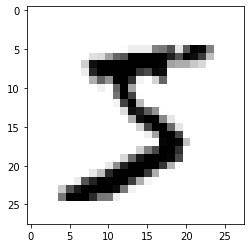

In [ ]:
print(y_train[0])
plt.imshow(X_train[0], cmap='gray_r')

In [ ]:
# 데이터 전처리
# normalization
X_train, X_test = X_train / 255.0, X_test / 255.0

In [ ]:
X_train = X_train.reshape(-1, 28, 28, 1) # (60000, 28, 28) => (60000, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [ ]:
# ont-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [ ]:
# 예측 모델 생성 및 학습
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64, input_shape=(28, 28, 1), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=256, padding='valid', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer=tf.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 256)       295168    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 256)        0         
 2D)                                                    

In [ ]:
model.fit(X_train, y_train, batch_size=100, epochs=10, validation_data=(X_test, y_test))
accuracy = model.evaluate(X_test, y_test)


Epoch 1/10
600/600 [==============================] - 805s 1s/step - loss: 0.1865 - accuracy: 0.9414 - val_loss: 0.0462 - val_accuracy: 0.9853
Epoch 2/10
600/600 [==============================] - 807s 1s/step - loss: 0.0551 - accuracy: 0.9843 - val_loss: 0.0261 - val_accuracy: 0.9915
Epoch 3/10
600/600 [==============================] - 804s 1s/step - loss: 0.0395 - accuracy: 0.9891 - val_loss: 0.0193 - val_accuracy: 0.9936
Epoch 4/10
600/600 [==============================] - 805s 1s/step - loss: 0.0316 - accuracy: 0.9907 - val_loss: 0.0280 - val_accuracy: 0.9916
Epoch 5/10
600/600 [==============================] - 804s 1s/step - loss: 0.0292 - accuracy: 0.9916 - val_loss: 0.0170 - val_accuracy: 0.9943
Epoch 6/10
600/600 [==============================] - 806s 1s/step - loss: 0.0230 - accuracy: 0.9933 - val_loss: 0.0206 - val_accuracy: 0.9937
Epoch 7/10
600/600 [==============================] - 806s 1s/step - loss: 0.0179 - accuracy: 0.9949 - val_loss: 0.0221 - val_accuracy: 0.9941

In [ ]:
print('Accuracy :', accuracy[1])

Accuracy : 0.9937999844551086


In [ ]:
# 모델 저장 - 체크포인트 콜백
model.save('mnist_model.h5')

In [ ]:
from google.colab import files
files.download('mnist_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>